
# Assignment No 4d
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of Conic weak learner based Random Forest.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [47]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/sharan/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [48]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [49]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

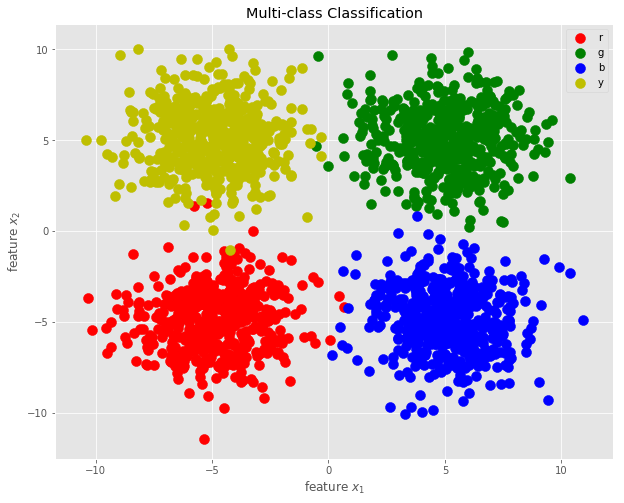

In [50]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),3*np.ones((nexamples/4,1)),4*np.ones((nexamples/4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples/4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples/4,1)),2*np.ones((ntexamples/4,1)),3*np.ones((ntexamples/4,1)),4*np.ones((ntexamples/4,1))))

In [51]:
import randomForest as rf

In [52]:
rfc=rf.RandomForest(weaklearner='Conic')

In [53]:
print X.shape, Y.shape

(2000, 2) (2000, 1)


In [54]:
rfc.train(X,Y)

In [55]:
len(rfc.trees)

10

In [56]:
%pdb
# Training Confusion Matrix...
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned ON
(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,496,0,1,3,500
2.0,0,495,4,1,500
3.0,11,0,489,0,500
4.0,8,3,0,489,500
All,515,498,494,493,2000


In [58]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

In [66]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)
print acc

0.9845


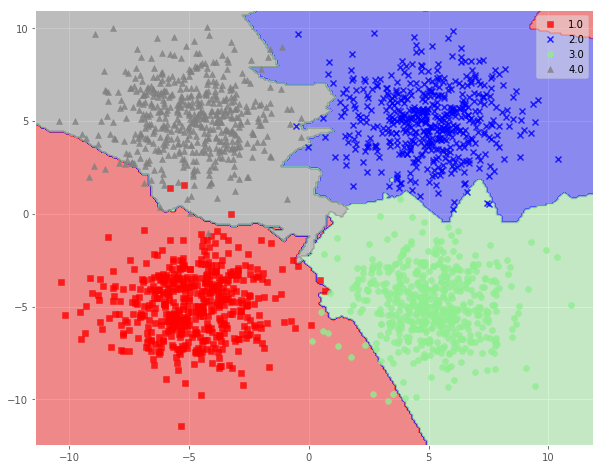

In [67]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [68]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,248,0,0,2,250
2.0,0,248,2,0,250
3.0,11,1,238,0,250
4.0,5,1,0,244,250
All,264,250,240,246,1000


In [69]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

In [70]:
print acc

0.978


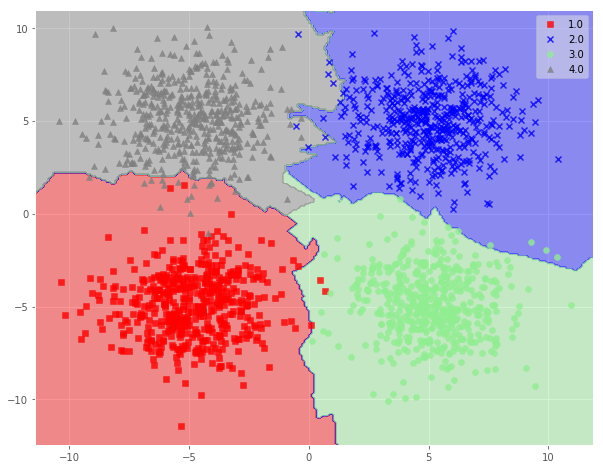

In [32]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

In [71]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
import tools as t

(10000, 2)
[1.0, 2.0, 3.0, 4.0]


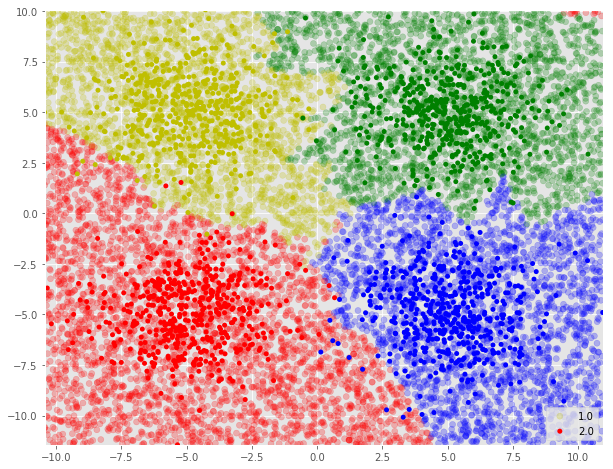

In [72]:
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

Automatic pdb calling has been turned ON


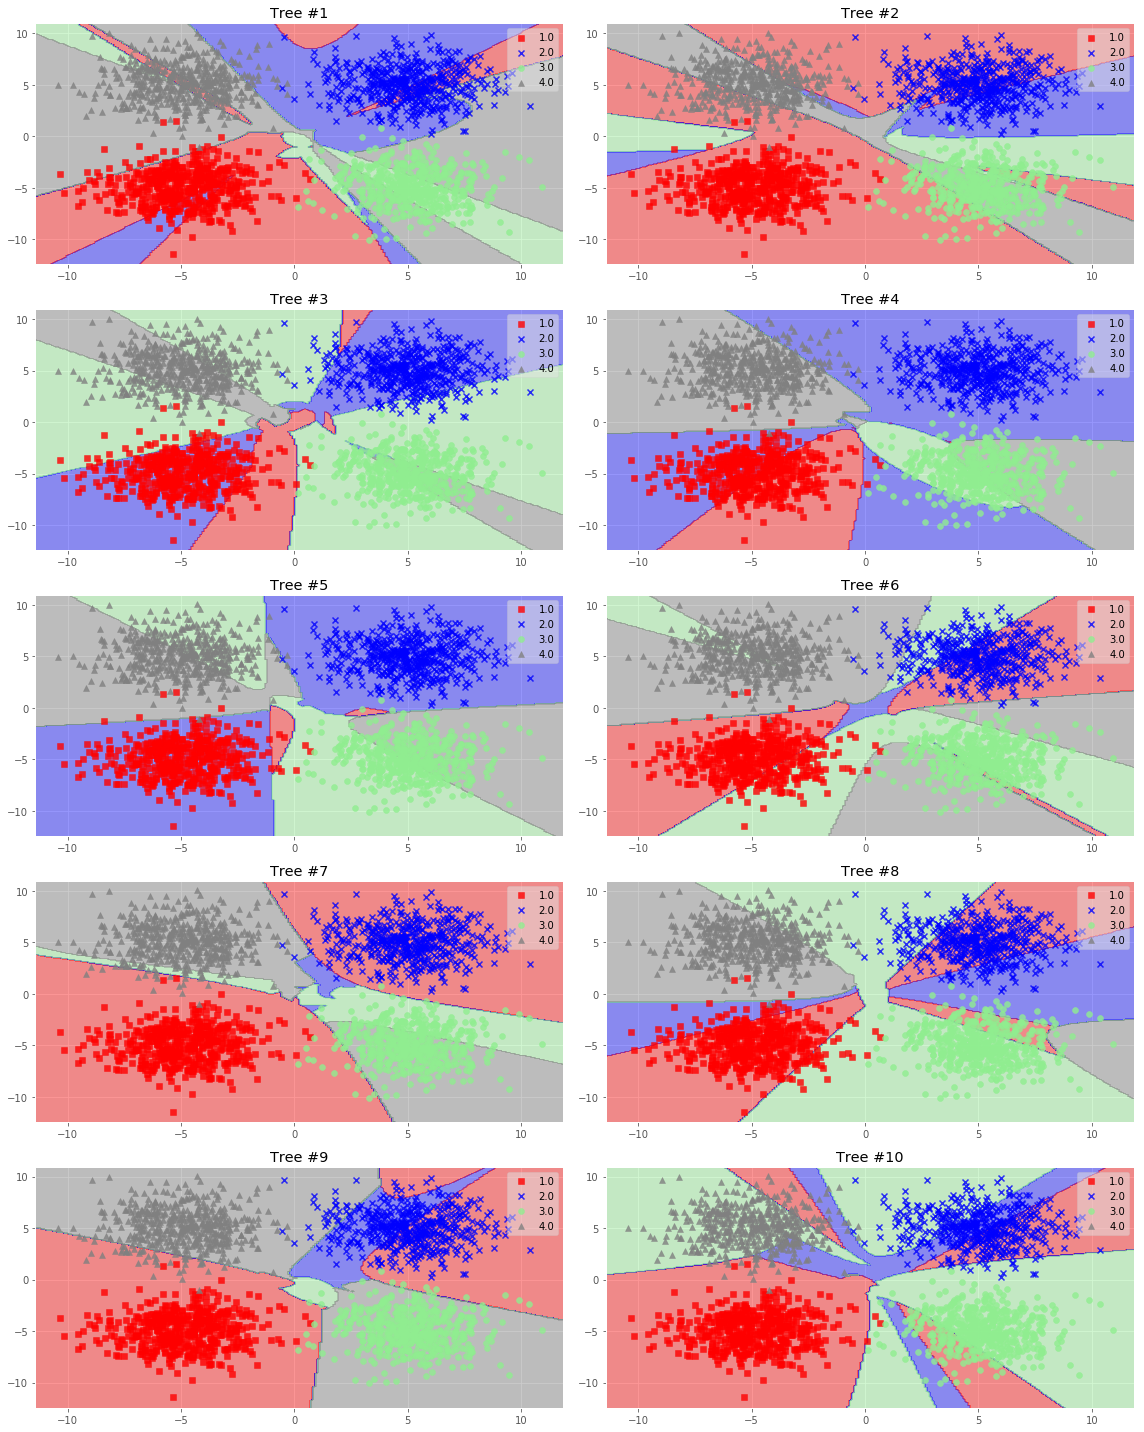

In [35]:
%pdb
ntrees=rfc.ntrees
nrows=ntrees/2 
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i+1))
    i=i+1
plt.tight_layout()

#### What Can You conclude

In [73]:
## Higher order polynomial has produced better results than previous linear weak learner because the data 
# fitted using a curve instead of a line

## Lets Run on Nonlinear Data, The Spherical Examples...

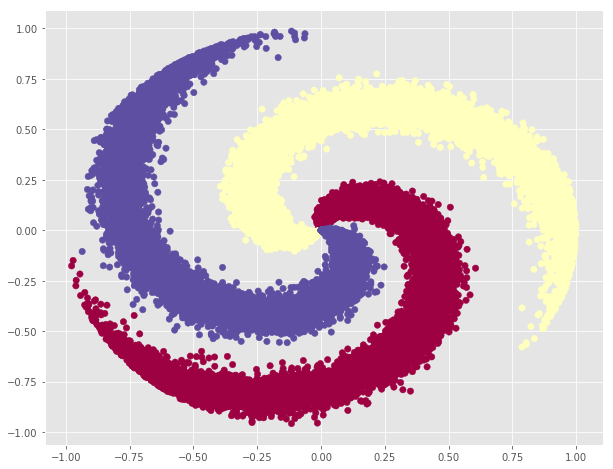

In [74]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

In [75]:
print X.shape, Y.shape

(30000, 2) (30000,)


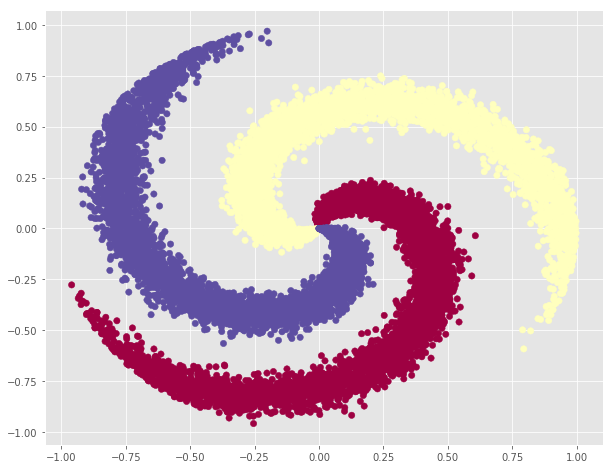

In [76]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [77]:
rfc=rf.RandomForest(weaklearner='Conic',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

In [78]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,9189,0,811,10000
1,1243,5774,2983,10000
2,101,378,9521,10000
All,10533,6152,13315,30000


In [79]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted,0,1,2,All
Actual,,,,
0,4580,0,420,5000
1,597,2896,1507,5000
2,57,171,4772,5000
All,5234,3067,6699,15000


In [80]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

In [81]:
print acc

0.816133333333


(10000, 2)
[0, 1, 2]


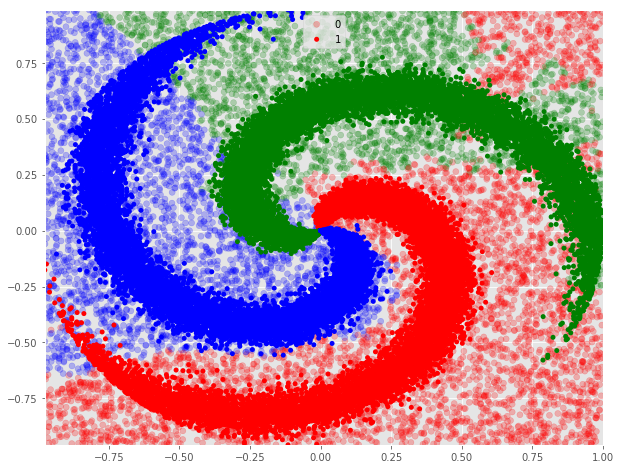

In [82]:
t.plot_points_range(rfc,X,Y)

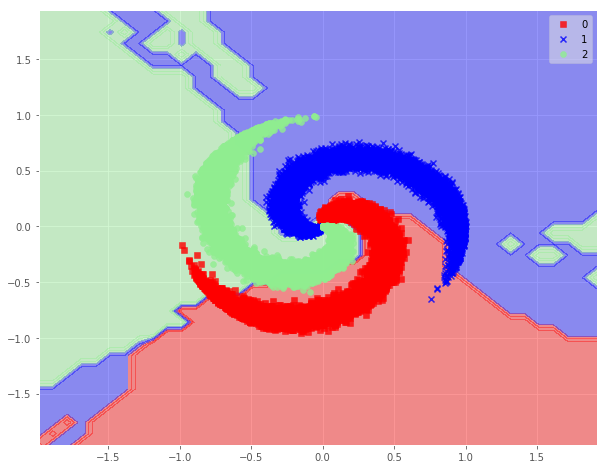

In [44]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

Automatic pdb calling has been turned OFF


<function matplotlib.pyplot.tight_layout>

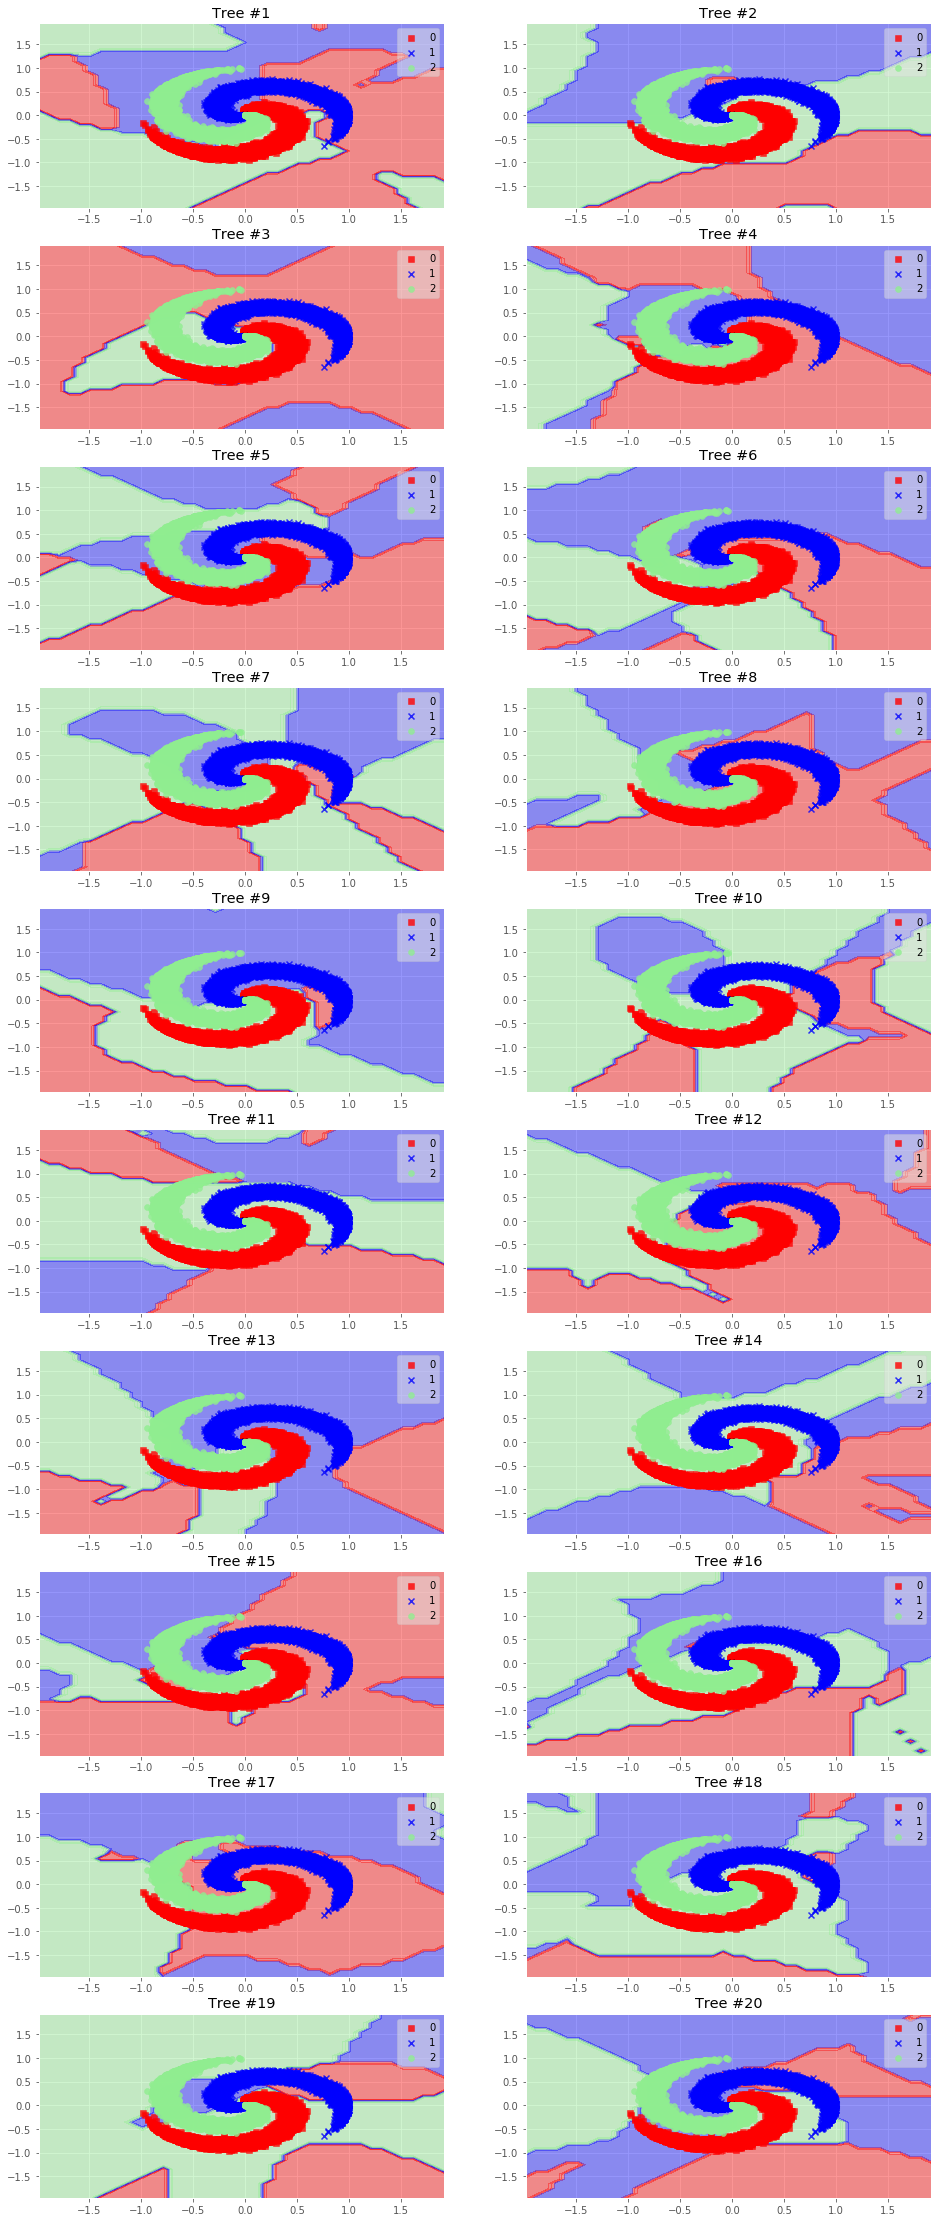

In [45]:
%pdb
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i+1))
    i=i+1
plt.tight_layout

### Lets Plot Per-Tree Decision Boundary

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

(30000, 2) (30000,)
Trees= 1  and Accuracy= 0.608533333333
Trees= 2  and Accuracy= 0.5938
Trees= 3  and Accuracy= 0.7118
Trees= 4  and Accuracy= 0.701066666667
Trees= 5  and Accuracy= 0.6268
Trees= 6  and Accuracy= 0.7656
Trees= 7  and Accuracy= 0.797133333333
Trees= 8  and Accuracy= 0.871266666667
Trees= 9  and Accuracy= 0.791333333333
Trees= 10  and Accuracy= 0.843666666667
Trees= 11  and Accuracy= 0.948
Trees= 12  and Accuracy= 0.941333333333
Trees= 13  and Accuracy= 0.871666666667
Trees= 14  and Accuracy= 0.897333333333
Trees= 15  and Accuracy= 0.812933333333
Trees= 16  and Accuracy= 0.912666666667
Trees= 17  and Accuracy= 0.856066666667
Trees= 18  and Accuracy= 0.8832
Trees= 19  and Accuracy= 0.8902
Trees= 20  and Accuracy= 0.8232


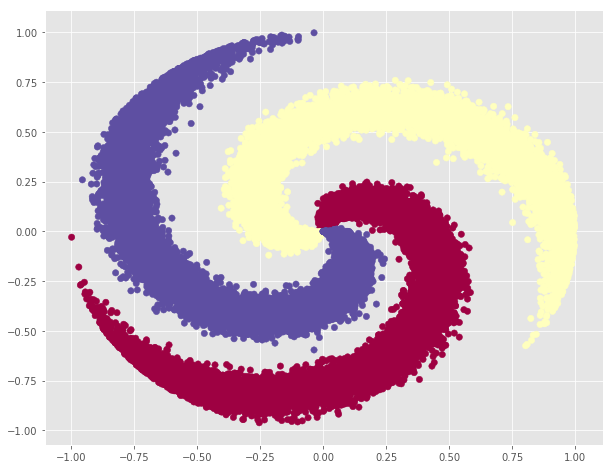

In [46]:
X,Y=t.get_spherical_data(N=10000)
print X.shape, Y.shape
Xtest,Ytest=t.get_spherical_data(N=5000)

trees = np.arange(1, 21)

for tree in trees:
    rfc=rf.RandomForest(weaklearner='Conic',usebagging=False,ntrees=tree)
    rfc.train(X,Y[:,np.newaxis])

    Ypt=rfc.predict(Xtest)

    acc = np.sum(Ytest ==  np.array(Ypt)) / float(Ytest.shape[0]) 

    print "Trees=", tree, " and Accuracy=", acc